## Libraries

In [330]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,roc_curve, auc

## Loading and cleaning the data set

In [332]:
df = sns.load_dataset('titanic')

In [333]:
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [334]:
print(df.isna().sum().sort_values(ascending=False)[df.isna().sum().sort_values(ascending=False)>0])
print(df.isna().sum().sort_values(ascending=False)[df.isna().sum().sort_values(ascending=False)>0]/df.shape[0])

deck           688
age            177
embarked         2
embark_town      2
dtype: int64
deck           0.772166
age            0.198653
embarked       0.002245
embark_town    0.002245
dtype: float64


In [335]:
df = df.loc[:,~df.columns.isin(["deck"])]
df = df.dropna()

In [336]:
np.sum(df.isna().sum())

np.int64(0)

In [337]:
df['class'] = df['class'].astype('object')

In [338]:
df.rename(columns={"who":"gender"},inplace=True)
df.drop(columns=["sex"],axis=1,inplace=True)

In [339]:
df

,survived,pclass,age,sibsp,parch,fare,embarked,class,gender,adult_male,embark_town,alive,alone
0,0,3,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,0,3,39.0,0,5,29.1250,Q,Third,woman,False,Queenstown,no,False
886,0,2,27.0,0,0,13.0000,S,Second,man,True,Southampton,no,True
887,1,1,19.0,0,0,30.0000,S,First,woman,False,Southampton,yes,True
889,1,1,26.0,0,0,30.0000,C,First,man,True,Cherbourg,yes,True


In [340]:
df = df.loc[:,~df.columns.isin(["adult_male","embarked","alive","parch","class"])]

In [341]:
df

,survived,pclass,age,sibsp,fare,gender,embark_town,alone
0,0,3,22.0,1,7.2500,man,Southampton,False
1,1,1,38.0,1,71.2833,woman,Cherbourg,False
2,1,3,26.0,0,7.9250,woman,Southampton,True
3,1,1,35.0,1,53.1000,woman,Southampton,False
4,0,3,35.0,0,8.0500,man,Southampton,True
...,...,...,...,...,...,...,...,...
885,0,3,39.0,0,29.1250,woman,Queenstown,False
886,0,2,27.0,0,13.0000,man,Southampton,True
887,1,1,19.0,0,30.0000,woman,Southampton,True
889,1,1,26.0,0,30.0000,man,Cherbourg,True


In [343]:
def fix_sibsp(x):
    if x > 2:
        return "Other"
    else:
        return x 

In [344]:
df['sibsp'] = df['sibsp'].apply(fix_sibsp)

C:\Users\piotr\AppData\Local\Temp\ipykernel_11284\520000952.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sibsp'] = df['sibsp'].apply(fix_sibsp)


## Exploratory analysis

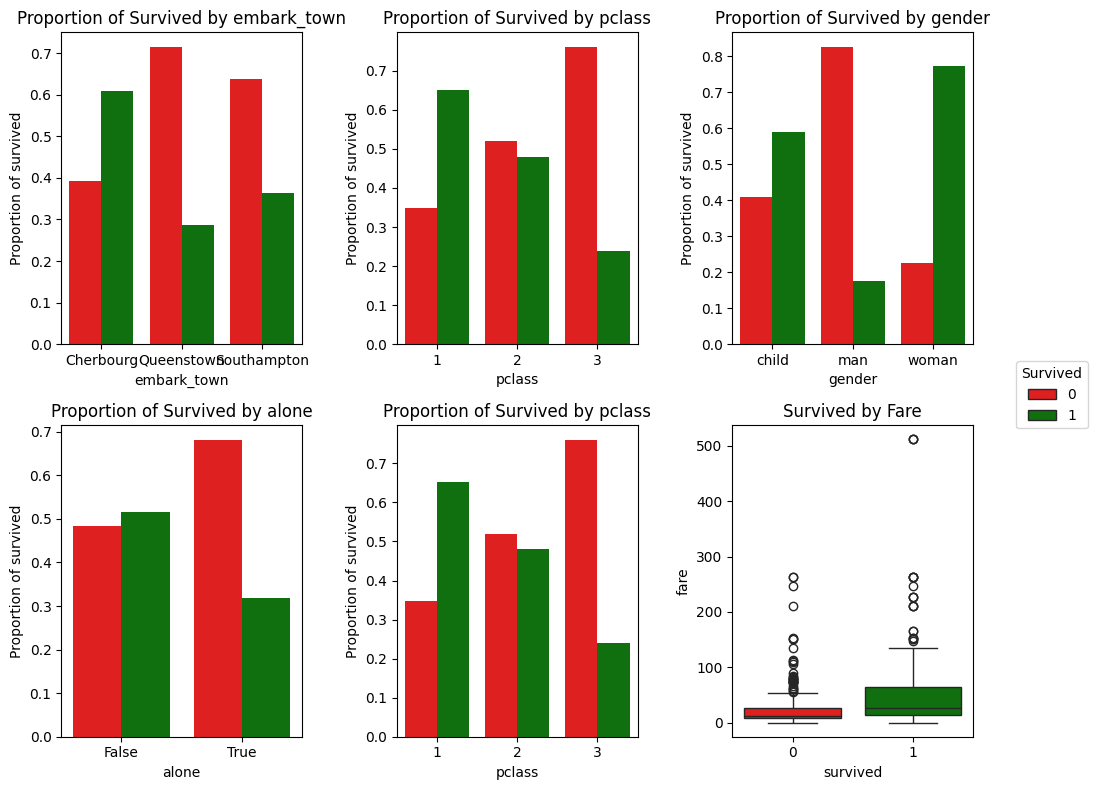

In [346]:
fig, axes = plt.subplots(ncols = 3, nrows = 2,figsize = (10,8))
axes = axes.flatten()
fig.subplots_adjust(hspace=2, wspace=2)

for ind, col in enumerate(['embark_town','pclass','gender','alone','pclass','fare']):
    
    if col != 'fare':
        plot = sns.barplot(data=df.groupby([col])['survived'].value_counts(normalize=True).reset_index(),
            x=col,
            y='proportion',
            hue='survived',
            palette=['red','green'],
            ax=axes[ind])
    
        axes[ind].set_title(f"Proportion of Survived by {col}")
        axes[ind].set_ylabel("Proportion of survived")
        axes[ind].set_xlabel(f"{col}")

    else:
        plot = sns.boxplot(data=df,
            x='survived',
            hue='survived',
            y='fare',
            palette=['red','green'],
            ax=axes[ind])
        
        axes[ind].set_title("Survived by Fare")

handles, labels = plot.get_legend_handles_labels()

# Remove the legends from all subplots
for ax in axes:
    ax.get_legend().remove()

# Add a single legend for the whole figure
fig.legend(handles, labels, title='Survived', loc='center right', bbox_to_anchor=(1.1, 0.5))

plt.tight_layout()
plt.show()

## Modeling part

### Data partition

In [347]:
X = df.drop(["survived"],axis=1)
y = df['survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, random_state=123)
print(f'X_train: {X_train.shape}')
print(f'X_test: {X_test.shape}')
print(f'y_train: {y_train.shape}')
print(f'y_test: {y_test.shape}')

X_train: (498, 7)
X_test: (214, 7)
y_train: (498,)
y_test: (214,)


In [350]:
X_train = pd.get_dummies(data=X_train,columns = ["sibsp","gender","pclass","embark_town","alone"],dtype=int,drop_first=True)
X_test = pd.get_dummies(data=X_test,columns = ["sibsp","gender","pclass","embark_town","alone"],dtype=int,drop_first=True)

In [353]:
mod = sm.Logit(y_train,X_train).fit()
print(mod.summary())

Optimization terminated successfully.
         Current function value: 0.441596
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:               survived   No. Observations:                  498
Model:                          Logit   Df Residuals:                      486
Method:                           MLE   Df Model:                           11
Date:                Fri, 23 Aug 2024   Pseudo R-squ.:                  0.3437
Time:                        18:51:16   Log-Likelihood:                -219.91
converged:                       True   LL-Null:                       -335.08
Covariance Type:            nonrobust   LLR p-value:                 3.625e-43
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
age                        -0.0052      0.010     -0.495      0.621      -0.026   

In [355]:
def group_round(x):
    if x >= 0.5:
        return 1
    else:
        return 0

In [357]:
predictions = mod.predict(X_test).apply(group_round)

In [360]:
print(classification_report(y_true = y_test, y_pred = predictions))

              precision    recall  f1-score   support

           0       0.80      0.90      0.85       125
           1       0.83      0.67      0.75        89

    accuracy                           0.81       214
   macro avg       0.81      0.79      0.80       214
weighted avg       0.81      0.81      0.80       214

